In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [4]:
df = pd.read_csv('SBAnational.csv')
df

/tmp/ipykernel_32044/3498453600.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [88]:
df['ApprovalDate'].sort_values().unique()

array(['1-Apr-02', '1-Apr-03', '1-Apr-04', ..., '9-Sep-97', '9-Sep-98',
       '9-Sep-99'], shape=(9859,), dtype=object)

In [89]:
# le nombre de banques 

len(df['Bank'].unique())

5803

In [90]:
# nombre d'états des banques qui sont étudiées

len(df['BankState'].unique())

57

In [91]:
# LE nombre de secteurs d'activité

len(df['NAICS'].astype(str).str.slice(0,2).unique())

25

In [92]:
# nb états des clients

len(df['State'].unique())

52

In [93]:
df['RetainedJob'].unique()

array([   0,    7,   23,    4,    6,    1,    9,   20,    2,    5,   19,
          8,    3,   10,   24,   12,   15,   11,   25,   44,   17,   14,
         65,   28,   38,   16,   42,   26,   18,   13,   50,   93,   40,
         37,   60,   21,   30,   31,   34,   35,  150,   22,   73,   41,
         45,  100,  180,   58,   75,  165,   36,  130,   29,   27,  125,
         99,   46,   32,  257,   43,   47,   80,   70,   54,   62,   33,
         39,  400,   55,   95,   48,  120,   71,   63,   81,   52,   94,
         78,  160,  109,   86,   77,  155,   85,   90,   64, 3225,   61,
         69,   66,  210,  107,   97,   51,   83,  112,   53,   72,   76,
         87,   68,  118,  138,   67,   57,   56,  117,  171,  229,  115,
        275,  153,  300,  105,  140,  135,   59,   79,  200,  295,  205,
        206,  128,  186,  137,  250,   89,   49,  131,   92,  404,  110,
        320,  139,   82,  108,   88,  104,  114,  134,  230,  102,  103,
         96,   98,   84,  101,  220,  233,   74,  2

In [94]:
df.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               70
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

In [95]:
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

In [96]:
df


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [5]:
df_2 = df.copy()

#Création de la colonne categorie activité
df_2['cat_activites'] = df['NAICS'].map(lambda x: str(x)[:2])

#Remplace les années avec 1976A par 1976 et passage en INT

df_2.replace('1976A',1976, inplace= True)
df_2['ApprovalFY'] = pd.to_numeric(df_2['ApprovalFY'])

# supprime le dollar et formate
df_2['SBA_loan_float'] = df_2['SBA_Appv'].map(lambda x : float(x[1:].replace(',','')))
df_2['bank_loan_float'] = df_2['GrAppv'].map(lambda x : float(x[1:].replace(',','')))


# Nettoyage de la colonne lowdoc le programme a été créé en 1993 avec les condtions d'être en dessous de 150000 dollars de prêt
df_2['LowDoc'] = df_2.apply(
    lambda row: row['LowDoc'] if row['LowDoc'] in ['Y', 'N']
    else ('N' if row['ApprovalFY'] < 1993 else ('N' if row['bank_loan_float'] > 150000 else 'Y')), axis=1)


# Formatage et de nettoyage de la colonne Approuval Date
# Modifier les années en fonction de la condition
df_2['ApprovalDate'] = df_2['ApprovalDate'].map(
    lambda x: x.replace(x[-3:], '-19' + x[-2:]) if int(x[-2:]) >= 50 else x.replace(x[-3:], '-20' + x[-2:])
)
df_2['ApprovalDate'] = pd.to_datetime(df_2['ApprovalDate'])

#Impute la valeur MIS_Status selon la valeur ChgOffDate (S'il y a une date de défaut, c'est que le prêt n'a pas été remboursé dans son entierté.)
df_2.loc[df_2["MIS_Status"].isna(), "MIS_Status"] = df_2["ChgOffDate"].notna().map({True: "CHGOFF", False: "P I F"})

# retirer les null dans state

#Trie le DataFrame par zip code en ordre ascendant
df_sorted = df_2.sort_values(by='Zip')

# Regroupe le DataFrame par Zip code
grouped = df_sorted.groupby('Zip')# Regroupe le DataFrame par Zip code
#Remplace les cellules State vides par la valeur State non-nulle correspondante dans chaque groupe
df_sorted['State'] = grouped['State'].fillna(method='ffill')
df_2 = df_sorted.sort_index()

#Remplace la dernière cellule vide par l'état AP pour base américaine
df_2 = df_2.fillna({'State':'AP'})
annee_crise = [1960,1961,1969,1970,1973,1974,1980,1981,1982,2000,2001,2007,2008]
df_2['crisis'] = df['ApprovalFY'].apply(lambda x : 1 if x in annee_crise else 0)


# df_2.dtypes

df_2.to_csv('dataset.csv', index = False)
# df_2.columns

/tmp/ipykernel_32044/439697376.py:40: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_sorted['State'] = grouped['State'].fillna(method='ffill')
/tmp/ipykernel_32044/439697376.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted['State'] = grouped['State'].fillna(method='ffill')
/tmp/ipykernel_32044/439697376.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sorted['State'] = grouped['State'].fillna(method='ffill')


In [99]:
for c in df_2.columns:
    print('pour la colonne', c,'il y a :')
    print(df_2[c].isna().sum())

pour la colonne LoanNr_ChkDgt il y a :
0
pour la colonne Name il y a :
14
pour la colonne City il y a :
30
pour la colonne State il y a :
14
pour la colonne Zip il y a :
0
pour la colonne Bank il y a :
1559
pour la colonne BankState il y a :
1566
pour la colonne NAICS il y a :
0
pour la colonne ApprovalDate il y a :
0
pour la colonne ApprovalFY il y a :
0
pour la colonne Term il y a :
0
pour la colonne NoEmp il y a :
0
pour la colonne NewExist il y a :
136
pour la colonne CreateJob il y a :
0
pour la colonne RetainedJob il y a :
0
pour la colonne FranchiseCode il y a :
0
pour la colonne UrbanRural il y a :
0
pour la colonne RevLineCr il y a :
4528
pour la colonne LowDoc il y a :
0
pour la colonne ChgOffDate il y a :
736465
pour la colonne DisbursementDate il y a :
2368
pour la colonne DisbursementGross il y a :
0
pour la colonne BalanceGross il y a :
0
pour la colonne MIS_Status il y a :
0
pour la colonne ChgOffPrinGr il y a :
0
pour la colonne GrAppv il y a :
0
pour la colonne SBA_App

In [100]:
pd.set_option('display.max_columns', None)
df_2
#df_2['ApprovalDate'][df_2['NewExist'].sort_values().isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0


In [13]:
pd.set_option('display.max_columns', None)
df_2.loc[df_2['NewExist'].isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,crisis
395231,3808405000,J.W.Chipping Corp,BETHLEHEM,NH,3574,FIRST COLEBROOK BANK,NH,423310,2009-12-15,2010,72,7,NaN,0,7,0,2,N,N,NaN,15-Dec-09,"$117,000.00",$0.00,P I F,$0.00,"$117,000.00","$99,450.00",42,99450.0,117000.0,2
399884,3854945010,D & R Foods Inc.,INDIANOLA,MS,38751,TRUSTMARK NATIONAL BANK,MS,445110,2010-01-13,2010,38,20,NaN,0,20,0,2,N,N,NaN,1-Feb-10,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$135,000.00",44,135000.0,150000.0,2
400052,3856405005,"Luna Design Group, Inc.",LYNNFIELD,MA,1940,PEOPLE'S UNITED BANK,CT,541310,2010-01-14,2010,73,4,NaN,0,4,0,1,N,N,NaN,25-Mar-10,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$25,000.00",54,25000.0,25000.0,2
400203,3857955008,Lisbon Market Inc,LISBON,OH,44432,THE CITIZENS SAVINGS BANK,OH,445110,2010-01-15,2010,84,0,NaN,25,0,0,1,N,N,NaN,15-Jan-10,"$350,000.00",$0.00,P I F,$0.00,"$350,000.00","$175,000.00",44,175000.0,350000.0,2
400300,3858915009,"George F. Gales, Jr. MD",QUINCY,MA,2170,EASTERN BANK,MA,621111,2010-01-15,2010,84,2,NaN,0,2,0,1,Y,N,NaN,1-Apr-10,"$52,395.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00",62,25000.0,50000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470308,4540125002,"GG&M, LLC",GENESEE,ID,83832,ZIONS FIRST NATIONAL BANK,UT,424410,2011-02-10,2011,0,2,NaN,1,3,0,1,Y,N,28-Feb-13,10-Feb-11,"$21,176.00",$0.00,CHGOFF,"$12,842.00","$15,000.00","$7,500.00",42,7500.0,15000.0,2
471939,4553585010,"MORGAN VENTURES, INC",COLLINS,MS,39428,COVINGTON COUNTY BANK,MS,722110,2011-02-23,2011,48,10,NaN,0,10,0,1,N,N,NaN,23-Feb-11,"$20,500.00",$0.00,P I F,$0.00,"$20,500.00","$17,425.00",72,17425.0,20500.0,2
498244,4820745005,Goodcare LLC,DELL RAPIDS,SD,57022,MINNWEST BANK,SD,624310,2011-08-12,2011,84,19,NaN,19,19,0,1,T,N,NaN,19-Aug-11,"$129,717.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00",62,50000.0,100000.0,2
512594,4957935004,"912 Enterprises Franchising, I",CRANBERRY TWP,PA,16066,FIRST COMMONWEALTH BANK,PA,311520,2011-11-16,2012,60,10,NaN,15,10,0,1,N,N,NaN,16-Nov-11,"$43,000.00",$0.00,P I F,$0.00,"$43,000.00","$21,500.00",31,21500.0,43000.0,2


In [101]:
df_newE = df_2['NewExist'].astype('category')
df_mis = df_2['MIS_Status'].astype('category')
contingency_table = pd.crosstab(df_newE, df_mis)
contingency_table

MIS_Status,CHGOFF,P I F
NewExist,,
0.0,69,965
1.0,110295,534574
2.0,47441,205684


In [102]:
df_2[df_2['NAICS'] == 0]

#200K plus lignes qui ont un NAICS qui est de 0

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,1980-06-02,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00",0,499998.0,600000.0
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,1997-02-28,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",0,56000.0,70000.0
13,1000154010,"ORCHARD CAFE & BAKERY, INC.",SLATERSVILLE,RI,2876,CITIZENS BANK NATL ASSOC,RI,0,1997-02-28,1997,120,2,2.0,0,0,1,0,N,N,NaN,31-May-97,"$370,000.00",$0.00,P I F,$0.00,"$370,000.00","$277,500.00",0,277500.0,370000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,1997-02-27,1997,119,5,1.0,0,0,1,0,0,N,7-Jul-04,31-May-97,"$142,000.00",$0.00,CHGOFF,$0.00,"$142,000.00","$106,500.00",0,106500.0,142000.0
899154,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,1997-02-27,1997,60,1,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",0,5000.0,10000.0
899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,1997-02-27,1997,84,5,2.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$79,000.00",$0.00,P I F,$0.00,"$79,000.00","$63,200.00",0,63200.0,79000.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0


In [103]:
from datetime import datetime

df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])

df_2

/tmp/ipykernel_11633/984317455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,dif_days_aproved_received
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0,730 days
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0,92 days
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0,306 days
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0,122 days
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0,75 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0,215 days
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0,246 days
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0,215 days
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0,32 days


In [104]:

df_2['ratio_SBA_bank'] = df_2['SBA_Appv'].map(lambda x : float(x[1:].replace(',',''))) / df_2['GrAppv'].map(lambda x : float(x[1:].replace(',','')))
df_2

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,dif_days_aproved_received,ratio_SBA_bank
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0,730 days,0.80
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0,92 days,0.80
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0,306 days,0.75
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0,122 days,0.80
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0,75 days,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0,215 days,0.80
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0,246 days,0.50
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0,215 days,0.75
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0,32 days,0.80


Voici une liste des principales crises financières aux États-Unis depuis 1960 :

    La récession de 1960-1961 :
        Période : avril 1960 - février 1961.
        Une récession modérée en raison de la politique monétaire restrictive et de la baisse de la consommation.

    La récession de 1969-1970 :
        Période : décembre 1969 - novembre 1970.
        Cette crise a été marquée par une forte inflation et un ralentissement économique dû à la guerre du Vietnam et à une politique monétaire plus stricte.

    La crise pétrolière de 1973-1974 :
        Période : octobre 1973 - mars 1975.
        La guerre du Kippour et l'embargo pétrolier ont provoqué une forte hausse des prix du pétrole, ce qui a conduit à une récession mondiale et une inflation élevée.

    La récession de 1980-1982 :
        Période : janvier 1980 - novembre 1982.
        En raison de politiques monétaires restrictives mises en place par la Réserve fédérale pour lutter contre l'inflation, cette récession a été marquée par une augmentation massive du chômage.

    La crise des caisses d'épargne et de crédit (S&L Crisis) de la fin des années 1980 et du début des années 1990 :
        Période : 1986 - 1995.
        La faillite de nombreuses caisses d’épargne et de crédit a été causée par une mauvaise gestion, des prêts risqués et des dérégulations.

    La récession de 2001 :
        Période : mars 2001 - novembre 2001.
        En raison de l'éclatement de la bulle Internet et des attentats du 11 septembre 2001, l'économie a connu une récession.

    La crise financière mondiale de 2007-2008 (Crise des subprimes) :
        Période : 2007 - 2009.
        Une crise financière mondiale majeure qui a débuté par une crise des prêts hypothécaires à risque (subprimes) et a conduit à une récession sévère.

In [106]:
#NB EST LA TABLE D'un group by entre mis status et newexist au final la donnée sur newexiste n'est pas pertinente

nb_mis = df_2.groupby(['MIS_Status', 'NewExist'])['NewExist'].count().reset_index(name='count')


nb_mis['ratio'] = nb_mis.apply(lambda row: 
                               row['count'] / nb_mis[nb_mis['MIS_Status'] == 'CHGOFF']['count'].sum() 
                               if row['MIS_Status'] == 'CHGOFF' 
                               else row['count'] / nb_mis[nb_mis['MIS_Status'] == 'P I F']['count'].sum(), 
                               axis=1)

nb_mis

,MIS_Status,NewExist,count,ratio
0,CHGOFF,1.0,110295,0.699238
1,CHGOFF,2.0,47441,0.300762
2,P I F,1.0,534574,0.722146
3,P I F,2.0,205684,0.277854


In [107]:
df_2['MIS_Status'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
899159    False
899160    False
899161    False
899162    False
899163    False
Name: MIS_Status, Length: 898130, dtype: bool

In [108]:
len(df_2['Zip'].astype(str).str[:2].unique())

100

In [109]:
pd.to_numeric(df_2['ApprovalFY'][df_2['ApprovalFY'] != '1976A']).sort_values().unique()



array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [110]:
df_2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'cat_activites', 'SBA_loan_float', 'bank_loan_float',
       'dif_days_aproved_received', 'ratio_SBA_bank'],
      dtype='object')

In [111]:
df_2_annee_MIS = df_2[['ApprovalFY', 'MIS_Status']]


df_2_annee_MIS_group = df_2_annee_MIS.groupby(['ApprovalFY','MIS_Status']).size()

df_2_annee_MIS_group_df = pd.DataFrame(df_2_annee_MIS_group).reset_index()
df_2_annee_MIS_group_df.columns = ['years', 'status','nb']
# Définir les intervalles de gravité des crises économiques
bins = [1968, 1972, 1979, 1991, 1997, 2002, 2008, 2014]
labels = ['Faible', 'Modéré', 'Moins grave', 'Modéré', 'Grave', 'Faible', 'Très grave']

# Appliquer pd.cut() pour classer les années selon les intervalles
df_2_annee_MIS_group_df['Crise Économique'] = pd.cut(df_2_annee_MIS_group_df['years'], bins=bins, labels=labels, right=False, ordered=False)

pd.set_option('display.max_rows', 120)
df_2_annee_MIS_group_df.head(118)

,years,status,nb,Crise Économique
0,1969,P I F,1,Faible
1,1970,CHGOFF,7,Faible
2,1970,P I F,1,Faible
3,1971,CHGOFF,20,Faible
4,1972,CHGOFF,23,Modéré
5,1972,P I F,4,Modéré
6,1973,CHGOFF,47,Modéré
7,1973,P I F,5,Modéré
8,1974,CHGOFF,40,Modéré
9,1974,P I F,2,Modéré


<Axes: xlabel='years', ylabel='nb'>

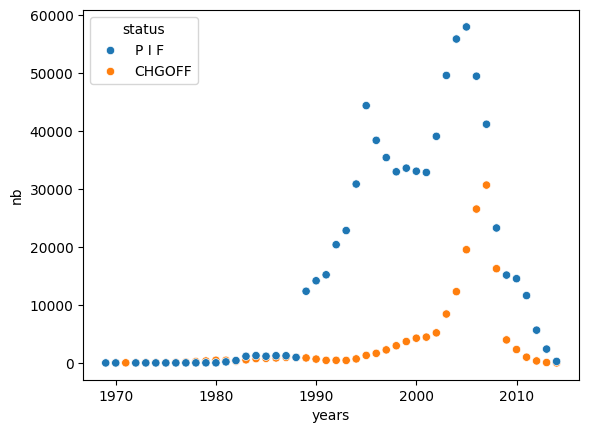

In [112]:
sns.scatterplot(x = "years", 
                y = "nb", 
                data = df_2_annee_MIS_group_df, 
                hue = "status")

<Axes: xlabel='years', ylabel='total_loan_bank'>

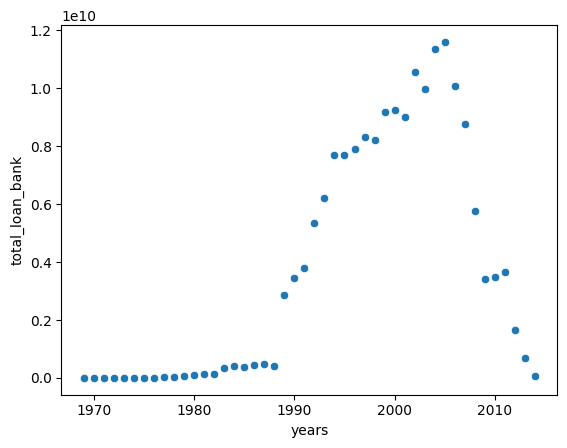

In [113]:
df_2_sum_years = df_2.groupby('ApprovalFY')['bank_loan_float'].sum()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'total_loan_bank']

sns.scatterplot(x = "years", 
                y = "total_loan_bank", 
                data = df_2_sum_years, 
                #hue = "status"
                )



<Axes: xlabel='years', ylabel='total_loan_SBA'>

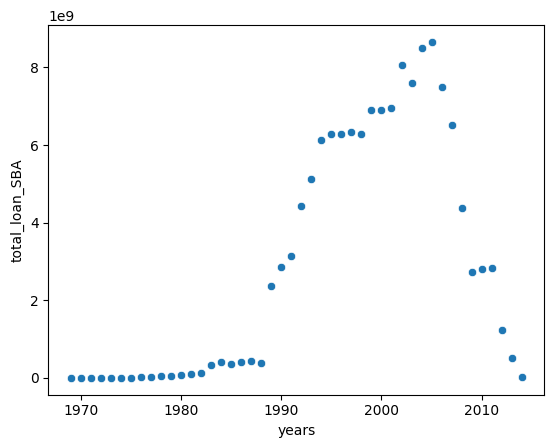

In [114]:
df_2_sum_years = df_2.groupby('ApprovalFY')['SBA_loan_float'].sum()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'total_loan_SBA']

sns.scatterplot(x = "years", 
                y = "total_loan_SBA", 
                data = df_2_sum_years, 
                #hue = "status"
                )


<Axes: xlabel='years', ylabel='nb_ApprovalFY'>

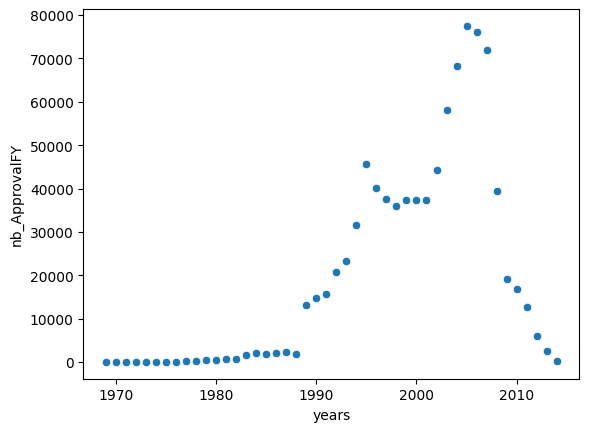

In [115]:
df_2_sum_years = df_2.groupby('ApprovalFY')['SBA_loan_float'].count()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'nb_ApprovalFY']

sns.scatterplot(x = "years", 
                y = "nb_ApprovalFY", 
                data = df_2_sum_years, 
                #hue = "status"
                )


### Sur l'augmentation des crédits fin des années 80

Consolidation des prêts garantis par le gouvernement : Les programmes de prêts garantis par la Small Business Administration (SBA) ont été renforcés dans les années 1980. Ces programmes permettaient de réduire les risques pour les prêteurs privés, rendant ainsi les crédits plus accessibles aux petites entreprises, même si elles étaient jugées plus risquées par les institutions financières.

### Baisse des prêts après la crise des subprimes 

2. Renforcement des régulations bancaires (loi Dodd-Frank) :

Après la crise financière de 2008, le gouvernement américain a mis en place de nouvelles régulations pour stabiliser le système financier et éviter de futures crises. La loi Dodd-Frank (2010) a notamment imposé des exigences strictes en matière de capital, de liquidité et de transparence pour les banques. Ces nouvelles régulations ont accru la charge administrative et le coût de l'octroi de crédits pour les banques, les incitant à se concentrer davantage sur des prêts jugés moins risqués et plus rentables. Les petites entreprises, souvent perçues comme plus vulnérables, ont donc eu plus de mal à obtenir des financements.

In [116]:
df_2['LowDoc'][(df_2['LowDoc'] != 'Y') & (df_2['LowDoc']!= 'N')].unique()

array([], dtype=object)

In [117]:
df_2['LowDoc'] = df_2['LowDoc'].apply(lambda x : x if x == 'Y' or x == 'N' else 'N' if x['ApprovalFY'] <= 1993 else 'N' if x['bank_loan_float']> 150000 else 'Y')

df_2['LowDoc'].unique()

/tmp/ipykernel_11633/721854825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['LowDoc'] = df_2['LowDoc'].apply(lambda x : x if x == 'Y' or x == 'N' else 'N' if x['ApprovalFY'] <= 1993 else 'N' if x['bank_loan_float']> 150000 else 'Y')


array(['Y', 'N'], dtype=object)

In [118]:
# Assurez-vous que les colonnes 'Lowdoc' et 'MIS_Status' sont de type catégoriel
low_d= df_2['LowDoc'].astype('category')
status_d= df_2['MIS_Status'].astype('category')

# Créez un tableau de contingence entre les deux variables
contingency_table = pd.crosstab(low_d, status_d)

In [119]:
contingency_table

MIS_Status,CHGOFF,P I F
LowDoc,,
N,146493,637658
Y,11257,102722


In [120]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Statistique Chi-2:", chi2)
print("Degrés de liberté:", dof)
print("P-value:", p)
print("Tableau des valeurs attendues :\n", expected)

Statistique Chi-2: 5328.23847517983
Degrés de liberté: 1
P-value: 0.0
Tableau des valeurs attendues :
 [[137730.41792391 646420.58207609]
 [ 20019.58207609  93959.41792391]]


In [121]:
df_var = df_2['State'].astype('category')
df_var

0         IN
1         IN
2         IN
3         OK
4         FL
          ..
899159    OH
899160    OH
899161    CA
899162    HI
899163    HI
Name: State, Length: 898130, dtype: category
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [141]:
df_2_chi2 = df_2[['State', 'NAICS','UrbanRural','LowDoc','Bank','RevLineCr','FranchiseCode','NewExist','cat_activites','MIS_Status']]

for column in df_2_chi2.columns:
    df_var = df_2_chi2[column].astype('category')
    df_cible = df_2_chi2['MIS_Status'].astype('category')
    contingency_table = pd.crosstab(df_var, df_cible)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    p_crit = stats.chi2.ppf(0.95, dof)
    print(f'le résultat pour {column}')
    print("Statistique Chi-2:", chi2)
    print("Degrés de liberté:", dof)
    print("valeur critique:", p_crit)

    print("P-value:", p)
    print("Tableau des valeurs attendues :\n", expected)
    print('')
    print('================================================================================')

le résultat pour State
Statistique Chi-2: 11190.991527570677
Degrés de liberté: 51
valeur critique: 68.66929391228578
P-value: 0.0
Tableau des valeurs attendues :
 [[4.22119541e+02 1.98288046e+03]
 [1.46767717e+03 6.89432283e+03]
 [1.75517481e-01 8.24482519e-01]
 [1.11295635e+03 5.22804365e+03]
 [3.09454870e+03 1.45364513e+04]
 [2.29260933e+04 1.07693907e+05]
 [3.61653769e+03 1.69884623e+04]
 [2.14640327e+03 1.00825967e+04]
 [2.83109696e+02 1.32989030e+03]
 [3.89648807e+02 1.83035119e+03]
 [7.23360193e+03 3.39793981e+04]
 [3.91000292e+03 1.83669971e+04]
 [6.33618105e+02 2.97638189e+03]
 [2.10550770e+03 9.89049230e+03]
 [1.66706503e+03 7.83093497e+03]
 [5.20742813e+03 2.44615719e+04]
 [2.48041304e+03 1.16515870e+04]
 [2.01230792e+03 9.45269208e+03]
 [1.35552150e+03 6.36747850e+03]
 [1.68075540e+03 7.89524460e+03]
 [4.43567777e+03 2.08363222e+04]
 [2.32894145e+03 1.09400585e+04]
 [1.04327591e+03 4.90072409e+03]
 [3.60600664e+03 1.69389934e+04]
 [4.27788756e+03 2.00951124e+04]
 [3.6295259

### Variables significatives 

toutes les variables vues au dessus sont significatives


In [123]:
df_2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'cat_activites', 'SBA_loan_float', 'bank_loan_float',
       'dif_days_aproved_received', 'ratio_SBA_bank'],
      dtype='object')

In [124]:
df_loan_mis = pd.crosstab(df_2['bank_loan_float'],df_mis)
df_loan_mis

MIS_Status,CHGOFF,P I F
bank_loan_float,,
200.0,0,2
300.0,1,0
400.0,0,2
500.0,2,31
700.0,0,4
...,...,...
4908500.0,0,1
4950000.0,0,1
4991700.0,0,1


In [125]:

print(stat_anova)
print(p_value)

0.5924381193985884
0.5219566314902659


In [138]:
df_2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'cat_activites', 'SBA_loan_float', 'bank_loan_float'],
      dtype='object')

In [137]:
df_2_anova = df_2[['CreateJob', 'RetainedJob','DisbursementGross','Term','BalanceGross','bank_loan_float','SBA_loan_float','MIS_Status']]

for column in df_2_anova.columns:
    df_cible = df_2_anova['MIS_Status'].astype('category')
    contingency_table = pd.crosstab(df_2_anova[column],df_cible )
    stat_anova, p_value = stats.f_oneway(contingency_table['CHGOFF'],contingency_table['P I F'])

    print(f'le résultat pour {column}')
    print("Statistique f:", stat_anova)
    # print("Degrés de liberté:", dof)
    # print("valeur critique:", p_crit)

    print("P-value:", p_value)
    # print("Tableau des valeurs attendues :\n", expected)
    print('')
    print('================================================================================')

le résultat pour CreateJob
Statistique f: 1.15131954474116
P-value: 0.28380123397877166

le résultat pour RetainedJob
Statistique f: 1.98657136834766
P-value: 0.15913523031102245

le résultat pour DisbursementGross
Statistique f: 67.97151839883365
P-value: 1.6670572512926197e-16

le résultat pour Term
Statistique f: 4.489314699286498
P-value: 0.034406707146474896

le résultat pour BalanceGross
Statistique f: 0.5927175314601383
P-value: 0.4478171468027803

le résultat pour bank_loan_float
Statistique f: 33.01463779657416
P-value: 9.206619245765622e-09

le résultat pour SBA_loan_float
Statistique f: 66.4964764820375
P-value: 3.5576163493494884e-16

le résultat pour MIS_Status
Statistique f: 0.5926945860653691
P-value: 0.5218768195961796

